## Assignment 1a

On paper

## Assignment 1b

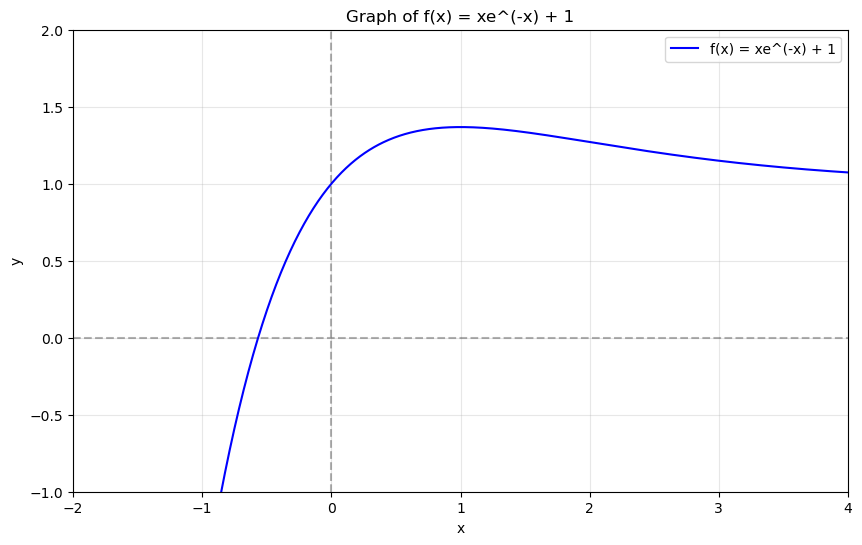

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2, 4, 1000)  # Create 1000 points between -2 and 4

#Define function
y = x * np.exp(-x) + 1

plt.figure(figsize=(10, 6))  # Set figure size

plt.plot(x, y, 'b-', label='f(x) = xe^(-x) + 1')

#Plot the x-axis (y=0 line)
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)

#Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graph of f(x) = xe^(-x) + 1')
plt.grid(True, alpha=0.3)
plt.legend()

# Step 8: Set appropriate axis limits
plt.xlim(-2, 4)
plt.ylim(-1, 2)

# Step 9: Show the plot
plt.show()

## Assignment 1c

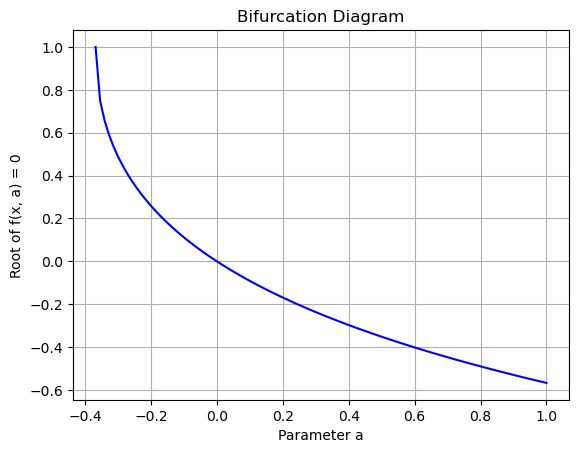

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Define the function with parameter 'a'
def f(x, a):
    return x * np.exp(-x) + a

# Define a range of 'a' values
a_values = np.linspace(-1/np.e, 1, 100)  # Adjust range and density as needed

# Initialize an array to store the roots
roots = np.empty_like(a_values)
roots.fill(np.nan)  # Fill with NaNs initially

# Loop through each value of 'a' and find the root using fsolve
for i, a in enumerate(a_values):
    try:
        # Use a guess for the root, e.g., x0 = 0
        root = fsolve(f, x0=0, args=(a,))
        # Check if f(root, a) is close to 0 to ensure it found a valid root
        if np.isclose(f(root, a), 0):
            roots[i] = root[0]
    except RuntimeError:
        # If no root is found or fsolve fails, keep NaN
        roots[i] = np.nan

# Plot the bifurcation diagram
plt.plot(a_values, roots, 'b', linewidth=1.5)
plt.xlabel('Parameter a')
plt.ylabel('Root of f(x, a) = 0')
plt.title('Bifurcation Diagram')
plt.grid(True)
plt.show()

## Assignment 2a

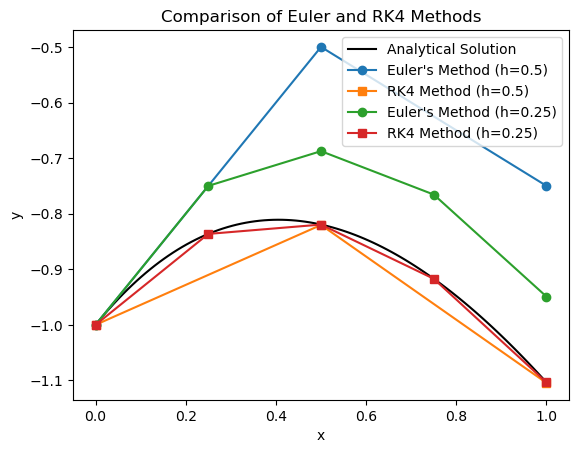

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Analytical solution function
def analytical_solution(x):
    return -3 * np.exp(-x) - 2 * x + 2

# Define the differential equation as a function
def f(x, y):
    return -2 * x - y

# Euler's method
def euler_method(f, x0, y0, h, x_end):
    x_values = [x0]
    y_values = [y0]
    x = x0
    y = y0
    while x < x_end:
        y += h * f(x, y)
        x += h
        x_values.append(x)
        y_values.append(y)
    return np.array(x_values), np.array(y_values)

# Runge-Kutta 4th order method
def runge_kutta_4(f, x0, y0, h, x_end):
    x_values = [x0]
    y_values = [y0]
    x = x0
    y = y0
    while x < x_end:
        k1 = h * f(x, y)
        k2 = h * f(x + h/2, y + k1/2)
        k3 = h * f(x + h/2, y + k2/2)
        k4 = h * f(x + h, y + k3)
        y += (k1 + 2*k2 + 2*k3 + k4) / 6
        x += h
        x_values.append(x)
        y_values.append(y)
    return np.array(x_values), np.array(y_values)

# Define parameters
x0, y0, x_end = 0, -1, 1
h_values = [0.5, 0.25]

# Plot solutions
x_exact = np.linspace(x0, x_end, 100)
y_exact = analytical_solution(x_exact)

plt.plot(x_exact, y_exact, 'k-', label="Analytical Solution")

for h in h_values:
    x_euler, y_euler = euler_method(f, x0, y0, h, x_end)
    x_rk4, y_rk4 = runge_kutta_4(f, x0, y0, h, x_end)
    plt.plot(x_euler, y_euler, 'o-', label=f"Euler's Method (h={h})")
    plt.plot(x_rk4, y_rk4, 's-', label=f"RK4 Method (h={h})")

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Comparison of Euler and RK4 Methods")
plt.show()


## Assignment 2b

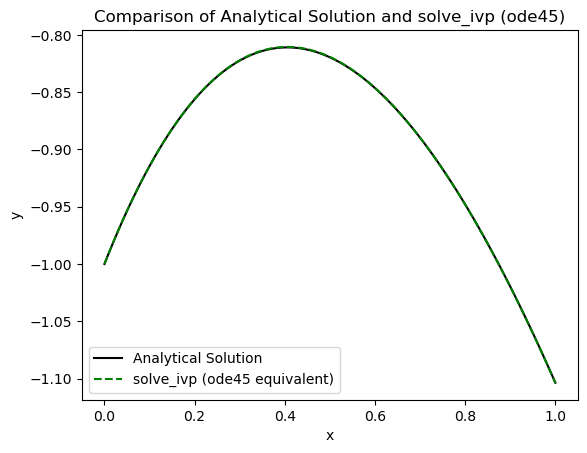

In [3]:
from scipy.integrate import solve_ivp

# Solve the differential equation with solve_ivp (equivalent to ode45)
def solve_with_solve_ivp():
    solution = solve_ivp(f, [x0, x_end], [y0], method='RK45', t_eval=x_exact)
    return solution.t, solution.y[0]

x_ode45, y_ode45 = solve_with_solve_ivp()

plt.plot(x_exact, y_exact, 'k-', label="Analytical Solution")
plt.plot(x_ode45, y_ode45, 'g--', label="solve_ivp (ode45 equivalent)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Comparison of Analytical Solution and solve_ivp (ode45)")
plt.show()


## Assignment 2c

Text answer

## Assignment 2d

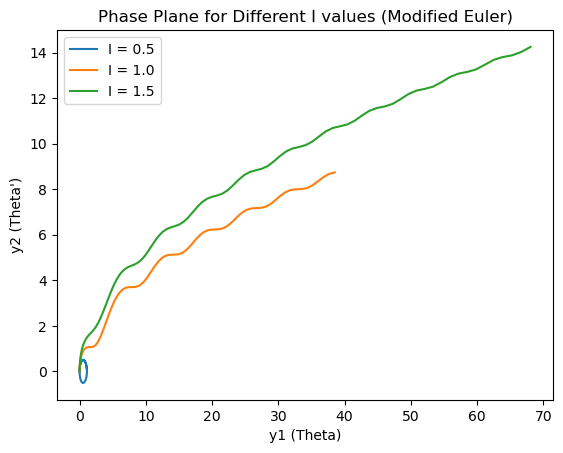

In [4]:
def pendulum_system(t, y, I):
    y1, y2 = y
    dy1dt = y2
    dy2dt = I - np.sin(y1)
    return [dy1dt, dy2dt]

# Modified Euler (Heun's method)
def modified_euler(f, y0, t0, t_end, h, I):
    t_values = [t0]
    y_values = [y0]
    t = t0
    y = y0
    while t < t_end:
        k1 = np.array(f(t, y, I))
        k2 = np.array(f(t + h, y + h * k1, I))
        y = y + (h / 2) * (k1 + k2)
        t += h
        t_values.append(t)
        y_values.append(y)
    return np.array(t_values), np.array(y_values)

# Parameters
t0, t_end, h = 0, 10, 0.1
y0 = [0, 0]  # Initial conditions for theta and theta'

# Solve for different values of I
I_values = [0.5, 1.0, 1.5]
plt.figure()
for I in I_values:
    t_vals, y_vals = modified_euler(pendulum_system, y0, t0, t_end, h, I)
    plt.plot(y_vals[:, 0], y_vals[:, 1], label=f"I = {I}")

plt.xlabel("y1 (Theta)")
plt.ylabel("y2 (Theta')")
plt.legend()
plt.title("Phase Plane for Different I values (Modified Euler)")
plt.show()


## Assignment 3a

Text answer

## Assignment 3b

Text answer

## Assignment 3c

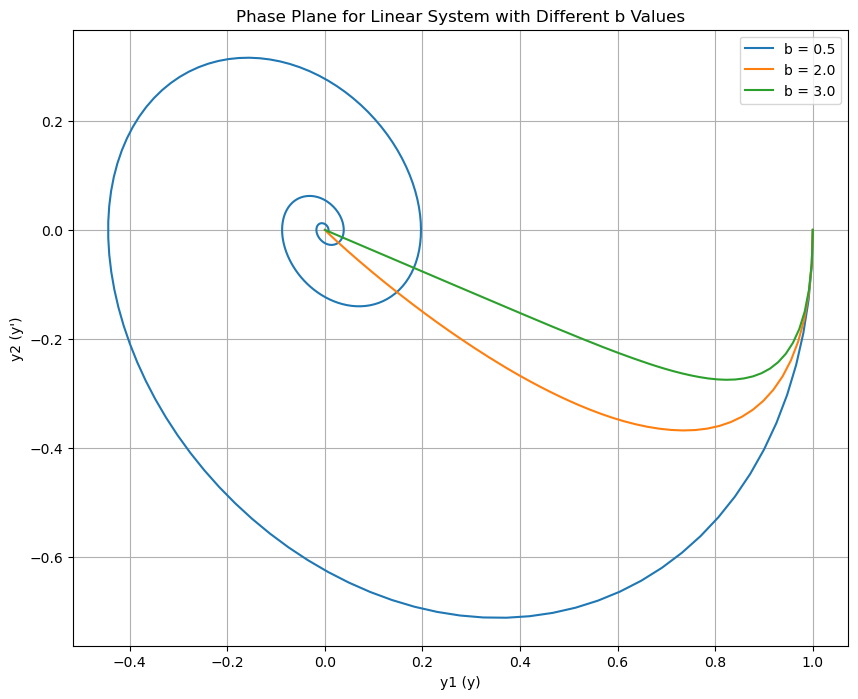

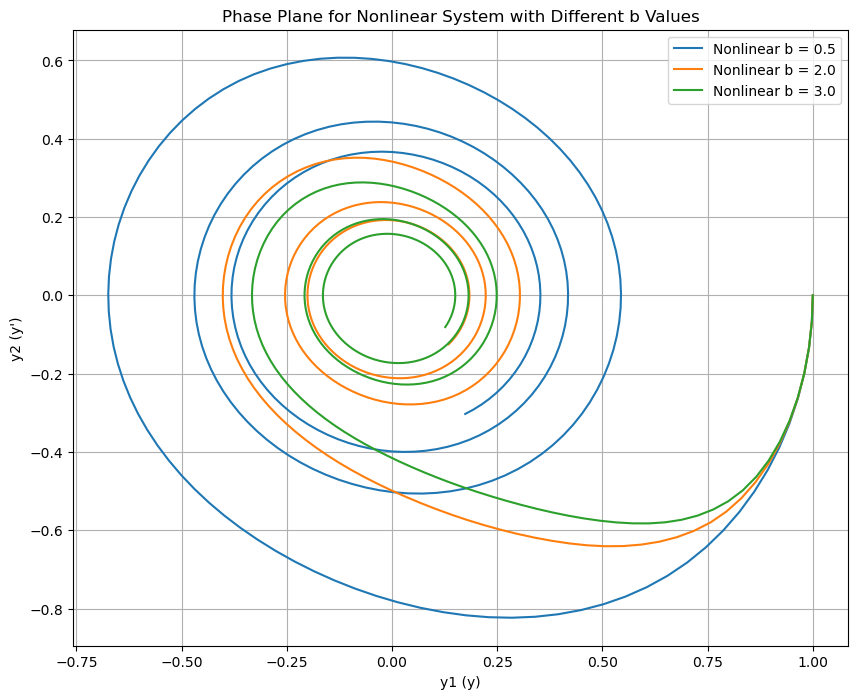

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the system of first-order equations
def linear_system(t, y, b):
    y1, y2 = y
    dy1dt = y2
    dy2dt = -b * y2 - y1
    return [dy1dt, dy2dt]

# Define the range of b values to explore
b_values = [0.5, 2.0, 3.0]  # Underdamped, critically damped, overdamped cases

# Time span and initial conditions
t_span = (0, 20)
y0 = [1, 0]  # Initial condition (y=1, y'=0)

plt.figure(figsize=(10, 8))

for b in b_values:
    solution = solve_ivp(linear_system, t_span, y0, args=(b,), dense_output=True)
    t_vals = np.linspace(*t_span, 300)
    y_vals = solution.sol(t_vals)
    plt.plot(y_vals[0], y_vals[1], label=f"b = {b}")

plt.xlabel("y1 (y)")
plt.ylabel("y2 (y')")
plt.legend()
plt.title("Phase Plane for Linear System with Different b Values")
plt.grid()
plt.show()


# Define the system of first-order equations for the nonlinear system
def nonlinear_system(t, y, b):
    y1, y2 = y
    dy1dt = y2
    dy2dt = -b * y2**3 - y1
    return [dy1dt, dy2dt]

# Solve and plot for nonlinear system
plt.figure(figsize=(10, 8))

for b in b_values:
    solution = solve_ivp(nonlinear_system, t_span, y0, args=(b,), dense_output=True)
    y_vals = solution.sol(t_vals)
    plt.plot(y_vals[0], y_vals[1], label=f"Nonlinear b = {b}")

plt.xlabel("y1 (y)")
plt.ylabel("y2 (y')")
plt.legend()
plt.title("Phase Plane for Nonlinear System with Different b Values")
plt.grid()
plt.show()
